#### In this part our main focus will be to engineer the key Metric that captures the core value that our product delivers to cusomters. Figuring this out will help us to do a deep dive analysis. Considering our dataset of an Online Retail store, we can go with Monthly Revenue as our key Metric. 
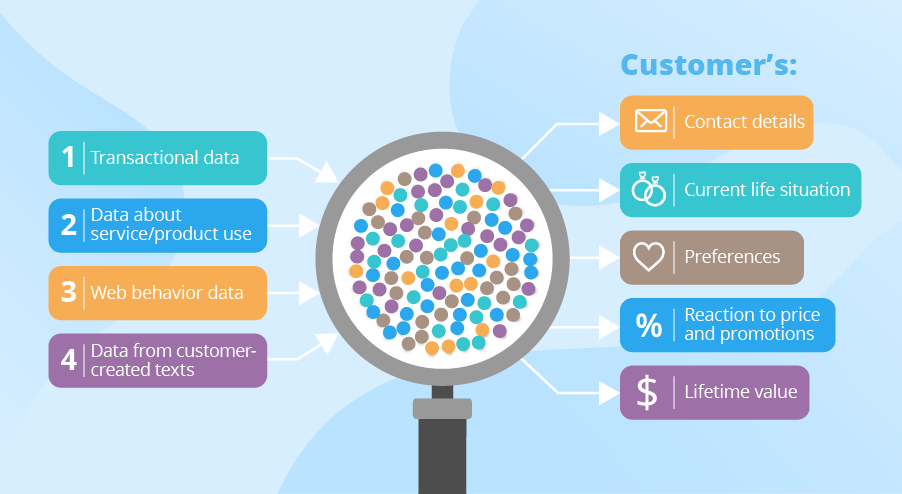

#### Importing required Libraries & the Dataset

In [28]:
# importing libraries

from __future__ import division
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker 

# importing custom functions

# For pulling data from AWS Postgres DB Instance - I have created a data_access_object.py file 
from data_access_object import get_data

# for cleaning and wrangling - I have created a data_transformation.py file for performing data tranformations
from data_transformation import remove_n_Row # dropping the first n rows from data
from data_transformation import assign_col_names # for assigning column names as provided
from data_transformation import change_data_type # for changing data types for our columns as required

ImportError: cannot import name 'change_data_type' from 'data_transformation' (C:\Users\aakas\Documents\Pathrise\Project Pipeline\e-commerce\Customer_Analytics_Repo\data_transformation.py)

### Importing Data
Loading data from _"data_access_object.py"_ file which supports a script to fetch data from AWS Postgres DB Instance.

In [13]:
# using custom 'get_data()' function to load data 
data = get_data()
# Let's have a look at our dataset
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom


**_There seems to be some mess with the data. let us apply some transformations to our data_**

### Data Preparation
I would be using custom functions importing them from my _"data_transformation.py"_ file.

In [31]:
# dropping the first n rows from data
data = remove_n_Row(0, data)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [32]:
# Changing the format of column names
data.columns = assign_col_names(data)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [33]:
# Let's look at the data types for our columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541908 entries, 2 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541908 non-null  object
 1   StockCode    541908 non-null  object
 2   Description  540454 non-null  object
 3   Quantity     541908 non-null  object
 4   InvoiceDate  541908 non-null  object
 5   UnitPrice    541908 non-null  object
 6   CustomerID   406828 non-null  object
 7   Country      541908 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [34]:
# Using our custom function to change the data types
def change_data_type(col,data_type):
    is_correct = None
    for i in col:
        if type(i) != data_type:
            is_correct = False
    if is_correct != False:
        print('True')
    elif is_correct == False:
        col = col.astype(data_type)        
        print('False')

In [37]:
change_data_type(data['InvoiceNo'], str)
change_data_type(data['StockCode'], str)
change_data_type(data['Description'], str)
change_data_type(data['Quantity'], int)
change_data_type(data['InvoiceDate'], 'datetime64[ns]')
change_data_type(data['UnitPrice'], float)
change_data_type(data['CustomerID'], 'int64')
change_data_type(data['Country'], str)

True
True
False
False
False
False


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

#### Engineering our Revenue Metric

In [5]:
# creating Month & Year field from Invoice Date
df['InvoiceYearMonth'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m')
# calculating Revenue using a custom function storing it in a new dataframe with Year & Month - Revenue
from Data_Transformation import Revenue
df['Revenue'] = Revenue(df['Quantity'], df['UnitPrice'])
df_rev = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_rev

,InvoiceYearMonth,Revenue
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


#### Visualizing the revenue using a line graph

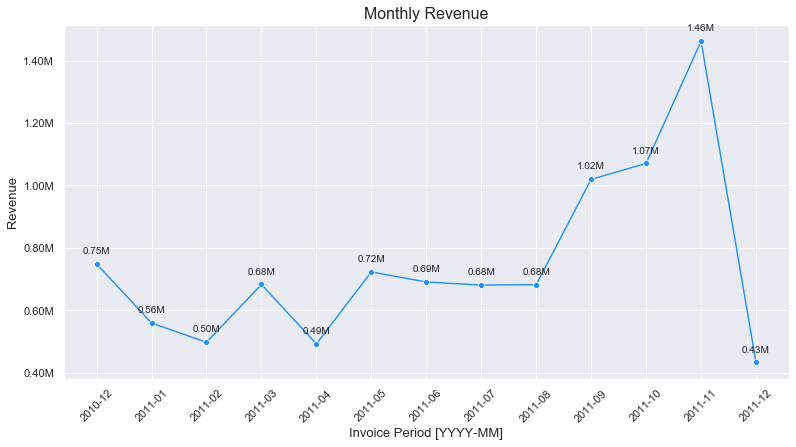

In [29]:
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2, rc={"lines.linewidth":1.4});
g = sns.lineplot(x='InvoiceYearMonth', y='Revenue', data= df_rev, marker='o', color = 'dodgerblue')
g.set_title("Monthly Revenue", fontsize = 16)
g.set_xlabel("Invoice Period [YYYY-MM]", fontsize = 13)
g.set_ylabel("Revenue", fontsize = 13)
ylabels = ['{:,.2f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
plt.xticks(rotation=45, fontsize = 11)
plt.yticks(fontsize = 11)

# Adding Data Labels for y axis --- to get the Revenue in Millions
for x,y in zip(df_rev['InvoiceYearMonth'],df_rev['Revenue']):

    label = '{:,.2f}'.format(y/1000000) + 'M'

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize = 10) # horizontal alignment can be left, right or center

The above graph clearly shows that our revenue is increasing especially in August 2011 onwards. The downward peak in data for December 2011 is due to the incomplete data

#### Monthly Revenue Growth Rate

C:\Users\aakas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



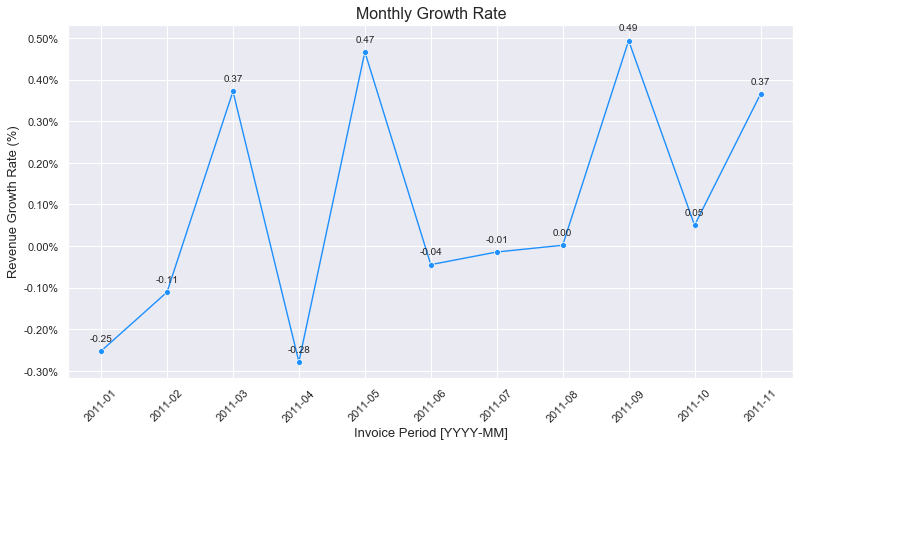

In [66]:
# calculating monthly percentage change using pct_change() function
df_rev['MonthlyGrowth'] = df_rev['Revenue'].pct_change()

# visualizing the % revenue growth
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2, rc={"lines.linewidth":1.4});
x = df_rev.query("InvoiceYearMonth < '2011-12'")['InvoiceYearMonth']
y = df_rev.query("InvoiceYearMonth < '2011-12'")['MonthlyGrowth']
g = sns.lineplot(x, y, marker='o', color = 'dodgerblue')
g.set_title("Monthly Growth Rate", fontsize = 16)
g.set_xlabel("Invoice Period [YYYY-MM]", fontsize = 13)
g.set_ylabel("Revenue Growth Rate (%)", fontsize = 13)
ylabels = ['{:,.2f}'.format(y) + '%' for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Adding Data Labels for y axis --- to get the Revenue in Millions
for x,y in zip(df_rev['InvoiceYearMonth'],df_rev['MonthlyGrowth']):

    label = '{:,.2f}'.format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 10) # horizontal alignment can be left, right or center

We can see 36.5% of growth in revenue from October 2011 to November 2011. But we need to dive deep to analyze what may have happened in April 2011.

#### Monthly Active Customers

We need to know the details of the Active Customers, but we will be focussing on UK based data as it has more records.

   InvoiceYearMonth  CustomerID
0           2010-12         871
1           2011-01         684
2           2011-02         714
3           2011-03         923
4           2011-04         817
5           2011-05         985
6           2011-06         943
7           2011-07         899
8           2011-08         867
9           2011-09        1177
10          2011-10        1285
11          2011-11        1548
12          2011-12         617


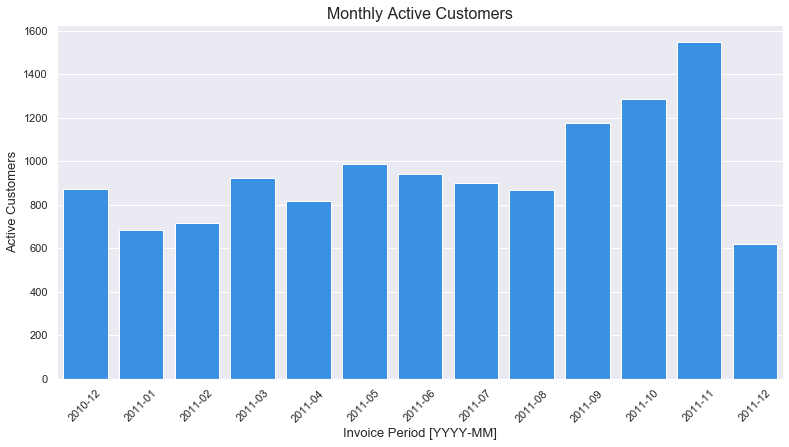

In [40]:
# Creating a new dataframe with UK customers only
df_uk = df.query("Country == 'United Kingdom'").reset_index(drop=True)


# creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

# print dataframe
print(df_monthly_active)

# visualizing the output
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
x = x=df_monthly_active['InvoiceYearMonth']
y = y=df_monthly_active['CustomerID']
g = sns.barplot(x, y, color= 'dodgerblue')
g.set_title("Monthly Active Customers", fontsize = 16)
g.set_xlabel("Invoice Period [YYYY-MM]", fontsize = 13)
g.set_ylabel("Active Customers", fontsize = 13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

What we can see is that in April 2011, Number of active customers dropped down by 11.5% as compared to March 2011 (from 923 to 817)

#### Monthly Order Count

   InvoiceYearMonth  Quantity
0           2010-12    298101
1           2011-01    237381
2           2011-02    225641
3           2011-03    279843
4           2011-04    257666
5           2011-05    306452
6           2011-06    258522
7           2011-07    324129
8           2011-08    319804
9           2011-09    458490
10          2011-10    455612
11          2011-11    642281
12          2011-12    199907


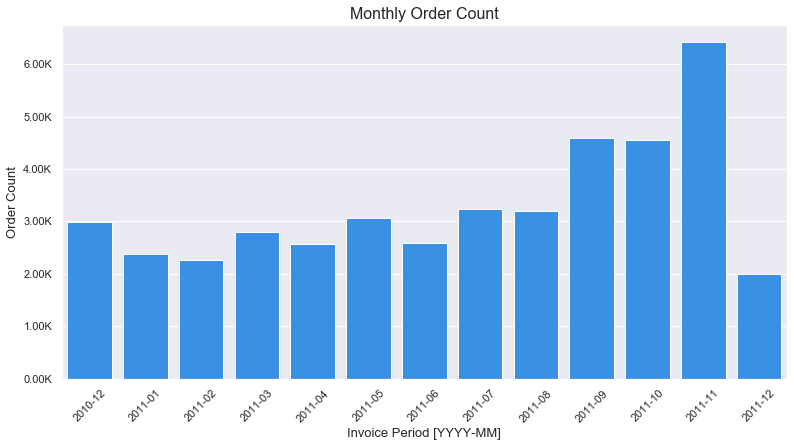

In [42]:
# creating monthly order count dataframe by using Quantity field
df_monthly_sales = df_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

# print dataframe
print(df_monthly_sales)

# visualizing the output
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
x = x=df_monthly_sales['InvoiceYearMonth']
y = y=df_monthly_sales['Quantity']
g = sns.barplot(x, y, color= 'dodgerblue')
g.set_title("Monthly Order Count", fontsize = 16)
g.set_xlabel("Invoice Period [YYYY-MM]", fontsize = 13)
g.set_ylabel("Order Count", fontsize = 13)
ylabels = ['{:,.2f}'.format(y) + 'K' for y in g.get_yticks()/100000]
g.set_yticklabels(ylabels)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

As expected, the Order Count has also declined in April 2011 by 8% (from 279k to 257k). We can say that # of Active Customers is directly affecting the # of Orders, which makes us to look into Average Revenue per Order.

   InvoiceYearMonth    Revenue
0           2010-12  16.865860
1           2011-01  13.614680
2           2011-02  16.093027
3           2011-03  16.716166
4           2011-04  15.773380
5           2011-05  17.713823
6           2011-06  16.714748
7           2011-07  15.723497
8           2011-08  17.315899
9           2011-09  18.931723
10          2011-10  16.093582
11          2011-11  16.312383
12          2011-12  16.247406


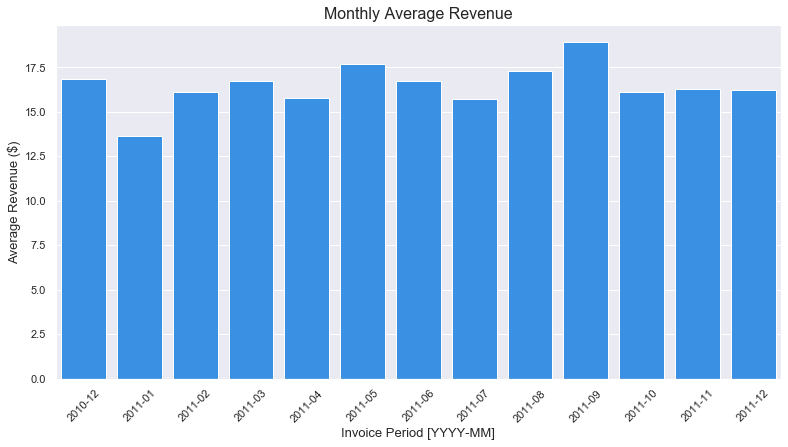

In [43]:
# create a new dataframe for average revenue by taking the mean of it
df_monthly_order_avg = df_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

#print the dataframe
print(df_monthly_order_avg)

#plot the bar chart
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
x = x=df_monthly_order_avg['InvoiceYearMonth']
y = y=df_monthly_order_avg['Revenue']
g = sns.barplot(x, y, color= 'dodgerblue')
g.set_title("Monthly Average Revenue", fontsize = 16)
g.set_xlabel("Invoice Period [YYYY-MM]", fontsize = 13)
g.set_ylabel("Average Revenue ($)", fontsize = 13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

Also, the Monthly Average Revenue declined in April 2011 from $16.7 to $15.8. Now, we saw a lot of downs affecting our Key Metric - Revenue 

#### It is the time to investigate some other metrics such as New Customer Ratio and Retention Rate

#### New Customer Ratio
It indicates if we are losing our customers or if we are unable to get hold of new ones

In [44]:
# create a dataframe conatining customer ID and first Purchase date
df_min_purchase = df_uk.groupby('CustomerID')['InvoiceDate'].min().reset_index()
df_min_purchase.columns = ['CustomerID', 'MinPurchaseDate']
df_min_purchase['MinPurchaseYearMonth'] = pd.to_datetime(df_min_purchase['MinPurchaseDate']).dt.strftime('%Y-%m')

# merging df_min_purchase with our main data frame (df_uk)

df_uk = pd.merge(df_uk, df_min_purchase, on='CustomerID')

print(df_uk.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceYearMonth  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          2010-12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010-12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          2010-12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010-12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          2010-12   

   Revenue     MinPurchaseDate MinPurchaseYearMonth  
0    15.30 2010-12-01 08:2

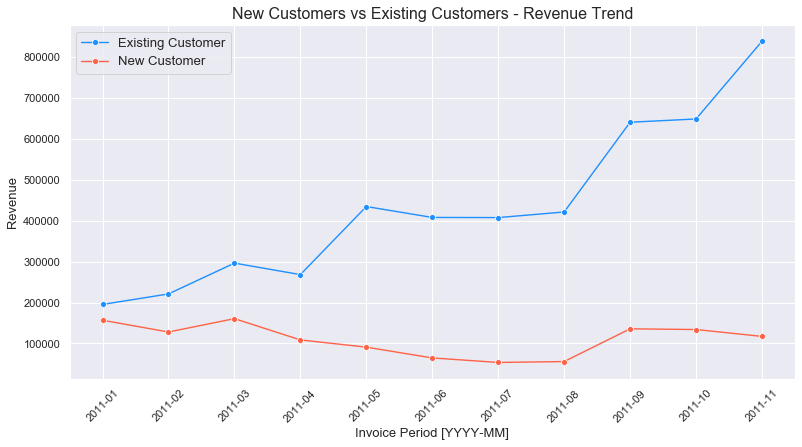

In [67]:
# Creating a new column User Type and labeling them as assigned if InvoiceYearMonth is after MinPurchaseDate
df_uk['UserType'] = 'New'
df_uk.loc[df_uk['InvoiceYearMonth'] > df_uk['MinPurchaseYearMonth'], 'UserType'] = 'Existing'

# Calculating Revenue per month for each user type
df_user_type_revenue = df_uk.groupby(['InvoiceYearMonth', 'UserType'])['Revenue'].sum().reset_index()

# Visualizing the results
df_user_type_revenue = df_user_type_revenue.query("InvoiceYearMonth != '2010-12' and InvoiceYearMonth != '2011-12'")

plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2, rc={"lines.linewidth":1.4});
x1 = df_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth']
y1 = df_user_type_revenue.query("UserType == 'Existing'")['Revenue']
g = sns.lineplot(x1, y1, marker='o', color = 'dodgerblue', label = 'Existing Customer')

x2=df_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth']
y2=df_user_type_revenue.query("UserType == 'New'")['Revenue']
g = sns.lineplot(x2, y2, marker = 'o', color = 'tomato', label = 'New Customer')

g.set_title("New Customers vs Existing Customers - Revenue Trend", fontsize = 16)
g.set_xlabel("Invoice Period [YYYY-MM]", fontsize = 13)
g.set_ylabel("Revenue", fontsize = 13)
plt.xticks(rotation=45, fontsize = 11)
plt.yticks(fontsize = 11)
g.legend();

We can see that the Existing Customers has a increasing trend which means that customer base is growing but new customers shows a slight negative trend

In [54]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,2010-12-01 08:26:00,2010-12,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,2010-12-01 08:26:00,2010-12,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010-12-01 08:26:00,2010-12,New


#### Revenue per Month for New and Existing Customers

In [55]:
df_user_type_revenue.query("InvoiceYearMonth != 2010-12 and InvoiceYearMonth != 2011-12")

,InvoiceYearMonth,UserType,Revenue
1,2011-01,Existing,195275.510
2,2011-01,New,156705.770
3,2011-02,Existing,220994.630
4,2011-02,New,127859.000
5,2011-03,Existing,296350.030
6,2011-03,New,160567.840
7,2011-04,Existing,268226.660
8,2011-04,New,108517.751
9,2011-05,Existing,434725.860
10,2011-05,New,90847.490


#### Let us Visualize New Customer Ratio

   InvoiceYearMonth  NewCustomerRatio
1           2011-01          1.124224
2           2011-02          0.904000
3           2011-03          0.792233
4           2011-04          0.510166
5           2011-05          0.343793
6           2011-06          0.281250
7           2011-07          0.236589
8           2011-08          0.192572
9           2011-09          0.304878
10          2011-10          0.328852
11          2011-11          0.236422
12          2011-12          0.058319


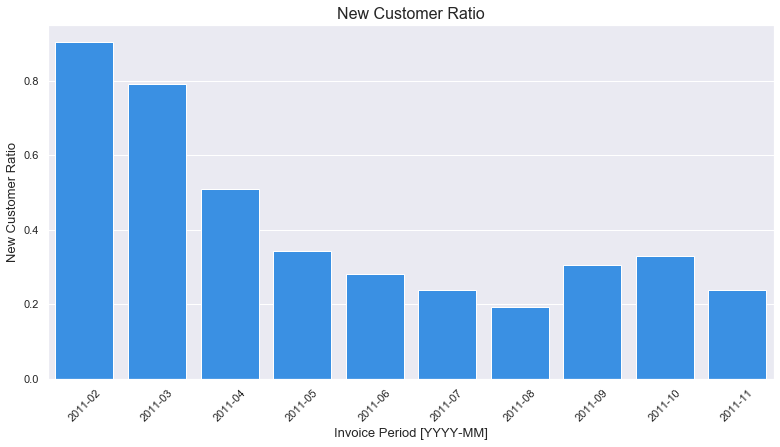

In [58]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
df_user_ratio = df_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/df_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio.rename(columns={'CustomerID': 'NewCustomerRatio'}, inplace=True)
df_user_ratio = df_user_ratio.dropna()

#print the dafaframe
print(df_user_ratio)

#plot the result

x=df_user_ratio.query("InvoiceYearMonth>'2011-01' and InvoiceYearMonth<'2011-12'")['InvoiceYearMonth']
y=df_user_ratio.query("InvoiceYearMonth>'2011-01' and InvoiceYearMonth<'2011-12'")['NewCustomerRatio']

plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2)
g = sns.barplot(x, y, color= 'dodgerblue')
g.set_title("New Customer Ratio", fontsize = 16)
g.set_xlabel("Invoice Period [YYYY-MM]", fontsize = 13)
g.set_ylabel("New Customer Ratio", fontsize = 13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

It is very clear that New Customer Ratio has declined over time

#### Monthly Retention Rate

To see how well our products fit the market and how sticky is our service, we need observe the Retention Rate. We can think of it as Retained Customers from Previous Month / Total Active Customers

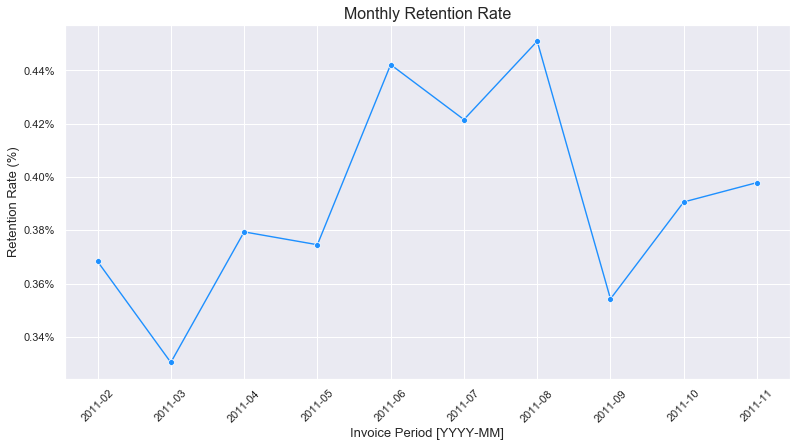

In [64]:
#identify which users are active by looking at their revenue per month
df_user_purchase = df_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['InvoiceYearMonth']).reset_index()

#create an array of dictionary which keeps Retained & Total User count for each month
months = df_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = selected_month
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]>0) & (df_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']

#plot the retention rate graph
plt.figure(figsize=(13,6.5))
sns.set(style='darkgrid', font_scale=1.2, rc={"lines.linewidth":1.4});
x = df_retention.query("InvoiceYearMonth<'2011-12'")['InvoiceYearMonth']
y = df_retention.query("InvoiceYearMonth<'2011-12'")['RetentionRate']
g = sns.lineplot(x, y, marker='o', color = 'dodgerblue')
g.set_title("Monthly Retention Rate", fontsize = 16)
g.set_xlabel("Invoice Period [YYYY-MM]", fontsize = 13)
g.set_ylabel("Retention Rate (%)", fontsize = 13)
ylabels = ['{:,.2f}'.format(y) + '%' for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11);

We can see that how Retention Rate has jumped significantly from May 2011 to August 2011 & again went down same as previous levels.